# A perceptron class

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Fetch the iris dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,NaN,NaN,NaN,NaN


Now, lets see if we can try to visualize any relationships with 1st colunm(sepal length) with 3rd column(petal length)

In [11]:
import matplotlib.pyplot as plt

# get the 1st and 3rd columns of the 1st 100 datasets
# setosa and versicolor
X = df.iloc[0:100, [0,2]].values

In [16]:
%matplotlib inline

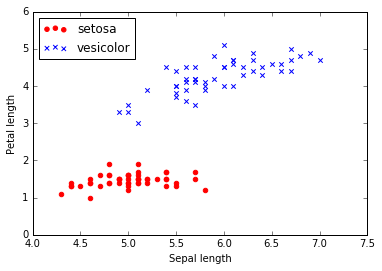

In [22]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='vesicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')

In [23]:
# ok, now get the target classes in y

In [24]:
y = df.iloc[:100,4].values

In [41]:
y=np.where(y=='Iris-setosa',1,-1)

In [42]:
# now create the perceptron
ppn = Perceptron(eta=0.1,n_iter=10)

In [43]:
ppn.fit(X,y)

In [47]:
ppn.errors_

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]

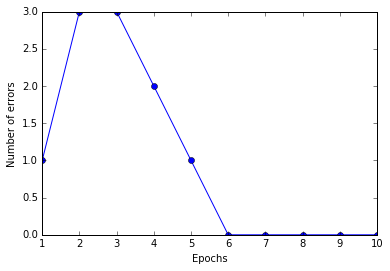

In [52]:
#lets try to see how the perceptron performed
# by plotting number of epochs against errors
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,color='blue',marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

In [158]:
X[:,0].max()

7.0

In [55]:
from matplotlib.colors import ListedColormap

In [185]:
#first, lets try to plot descision regions that clearly separates the classes
# for this, we will need a map, that would relate to the target value for each point(x,y) on the XY plane

def plot_descision_regions(X,y,classifier,resolution=0.02):
    ''' Plot desicion regions for a dataset and classifier
    X - is the dataset with m rows. each row is an array of features
    y - actual target value of the m datasets
    classifier- classifier for perdicting
    resolution - resolution for the grid map.
    '''
    #first create a cmap
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # next, get the min and max values in the grid
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1 
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    # Next create a meshgrid, used for plotting functions
    xx,yy = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    # get the predictions in zz for all the values in xx,yy
    # first flatten them, and add them as 2 rows
    # like - [xx.ravel(),yy.ravel()]
    # Now to get points of the type(x,y) simply transpose it
    # like [xx.ravel(),yy.ravel()].T
    zz = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
    # Now convert zz to the same dimension as xx
    zz = zz.reshape(xx.shape)
    # and plot a contour function
    plt.contourf(xx,yy,zz,alpha=0.4,cmap=cmap)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],c=cmap(idx),alpha=0.8,marker=markers[idx],label=cl)


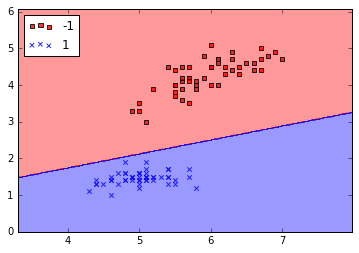

In [186]:
plot_descision_regions(X,y,ppn)
plt.legend(loc='upper left')

In [181]:
# As an excercise, try to plot descision regions for veriolor and verginica
# and columns 1 and 3

In [194]:
X2 = df.iloc[50:150,[1,3]].values

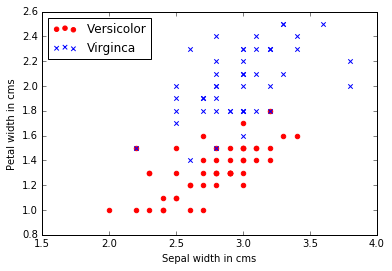

In [205]:
# Plot a scatter plot for sepal width vs petal width
plt.scatter(X2[:50,0],X2[:50,1],color='red',marker='o',label='Versicolor')
plt.scatter(X2[50:,0],X2[50:,1],color='blue',marker='x',label='Virginca')
plt.xlabel('Sepal width in cms')
plt.ylabel('Petal width in cms')    
plt.legend(loc='upper left')

In [203]:
# Next use the perceptron to train
y2 = df.iloc[50:150,4].values

In [209]:
y2 = np.where(y2 == 'Iris-versicolor',1,-1)

In [223]:
# now lets create a perceptron
ppn2 = Perceptron(eta=0.1,n_iter=1000)

In [224]:
ppn2.fit(X2,y2)

In [ ]:
#So here we can see that the perceptron does not converge

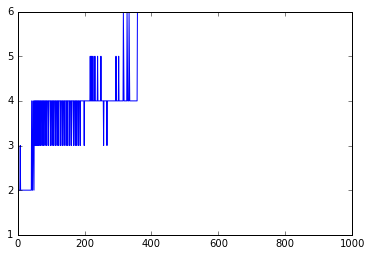

In [238]:
plt.plot(range(1,len(ppn2.errors_)+1),ppn2.errors_,color='blue')

In [260]:
#ok lets implemet the Adaptive linear neuron

In [261]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [273]:
# lets try to compare the objective fn J(w) based on learning rates
# lets fit the classifier
adal = AdalineGD(eta=0.1,n_iter=10).fit(X,y)

In [284]:
adal2 = AdalineGD(eta=0.0001,n_iter=10).fit(X,y)

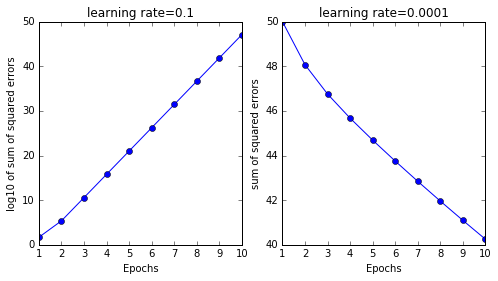

In [287]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ax[0].plot(range(1,len(adal.cost_)+1),np.log10(adal.cost_),color='blue',marker='o')
ax[1].plot(range(1,len(adal2.cost_)+1),adal2.cost_,color='blue',marker='o')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('log10 of sum of squared errors')
ax[1].set_ylabel('sum of squared errors')
ax[0].set_title('learning rate=0.1')
ax[1].set_title('learning rate=0.0001')

In [288]:
# lets standardize the feaures, this is the same as pearson's standardization

Standardize cofficient like this
$$x'_j = \frac{x_j - \mu}{\delta}$$

In [289]:
X_std = np.copy(X)

In [301]:
# standardize first column, which is sepal length feature
X_std[:,0] = (X_std[:,0] - np.mean(X_std[:,0]))/ np.std(X_std[:,0])

In [304]:
# standardize the 2nd column, which is petal length feature
X_std[:,1] = (X_std[:,1] - np.mean(X_std[:,1]))/ np.std(X_std[:,1])

In [306]:
#Now fit this dataset with a learning rate of just 0.01
adal3 = AdalineGD(eta=0.01,n_iter=10).fit(X_std,y)

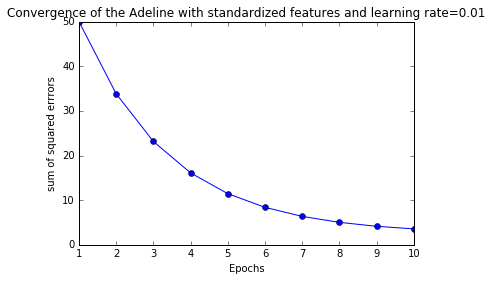

In [307]:
# and plot the objective function
plt.plot(range(1,len(adal3.cost_)+1),adal3.cost_,color='blue',marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum of squared errrors')
plt.title('Convergence of the Adeline with standardized features and learning rate=0.01')

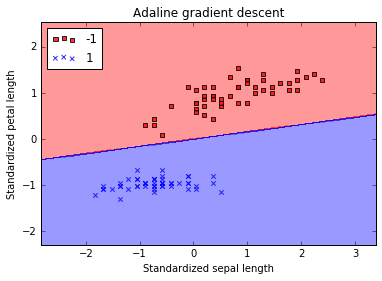

In [313]:
# plot desicion regions
plot_descision_regions(X_std,y,adal3)
plt.title('Adaline gradient descent')
plt.xlabel('Standardized sepal length')
plt.ylabel('Standardized petal length')
plt.legend(loc='upper left')